In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from stable_baselines import A2C, DQN
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv

from dmarket.environments import SingleAgentTrainingEnv
from dmarket.agents import UniformRandomAgent, GymRLAgent, TimeDependentAgent
from dmarket.info_settings import BlackBoxSetting, TimeInformationWrapper
from dmarket.engine import MarketEngine

/home/zhs/docs/abm/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zhs/docs/abm/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zhs/docs/abm/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zhs/docs/abm/env/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [2]:
class RandomIntervalAgent(TimeDependentAgent):
    def compute_offer(self, obs, time):
        last_offer = obs[0]
        r = self.reservation_price
        c = self._c # max factor
        if time == 0:
            last_offer = c*r # most aggressive offer
        
        a = min(last_offer, r)
        b = max(last_offer, r)
        return np.random.uniform(a,b)

In [3]:
fixed_agents = [
    RandomIntervalAgent('seller', 90, max_factor=0.25),
    RandomIntervalAgent('seller', 90, max_factor=0.25),
    RandomIntervalAgent('seller', 90, max_factor=0.25),
    RandomIntervalAgent('buyer', 110, max_factor=0.25),
    RandomIntervalAgent('buyer', 110, max_factor=0.25),
    RandomIntervalAgent('buyer', 110, max_factor=0.25),
]

rl_agent = GymRLAgent('buyer', 110, discretization=20, max_factor=0.25)
setting = TimeInformationWrapper(BlackBoxSetting())

def get_env(rl_agent, fixed_agents, setting):
    return SingleAgentTrainingEnv(rl_agent, fixed_agents, setting)

env = DummyVecEnv([lambda: get_env(rl_agent, fixed_agents, setting)]) # wrap it for baselines

Initialize a deep-Q RL model with MLP policy and high learning rate:

In [4]:
model = DQN("LnMlpPolicy", env, verbose=1, gamma=0.95, learning_rate=0.01, exploration_final_eps=0.1)







Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [20]:
episodes = []
rewards = []
def log_rewards(lvar, gvar):
    try:
        ep = lvar['num_episodes']
        if ep >= 10000: return False
        if ep % 100 == 0:
            rewards.append(lvar['mean_100ep_reward'])
            episodes.append(lvar['num_episodes'])
    except KeyError:
        return True
    return True

In [ ]:
%%time
model.learn(total_timesteps=17000, callback=log_rewards)

--------------------------------------
| % time spent exploring  | 89       |
| episodes                | 100      |
| mean 100 episode reward | 6.4      |
| steps                   | 190      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 79       |
| episodes                | 200      |
| mean 100 episode reward | 7.4      |
| steps                   | 382      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 69       |
| episodes                | 300      |
| mean 100 episode reward | 7.4      |
| steps                   | 571      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 59       |
| episodes                | 400      |
| mean 100 episode reward | 7.5      |
| steps                   | 759      |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 9        |
| episodes                | 3700     |
| mean 100 episode reward | 8.3      |
| steps                   | 5686     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 9        |
| episodes                | 3800     |
| mean 100 episode reward | 8.5      |
| steps                   | 5827     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 9        |
| episodes                | 3900     |
| mean 100 episode reward | 8.6      |
| steps                   | 5973     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 9        |
| episodes                | 4000     |
| mean 100 episode reward | 8.4      |
| steps                   | 6126     |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 9        |
| episodes                | 7300     |
| mean 100 episode reward | 8.9      |
| steps                   | 10786    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 9        |
| episodes                | 7400     |
| mean 100 episode reward | 8.8      |
| steps                   | 10921    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 9        |
| episodes                | 7500     |
| mean 100 episode reward | 8.6      |
| steps                   | 11057    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 9        |
| episodes                | 7600     |
| mean 100 episode reward | 7.5      |
| steps                   | 11216    |
--------------------------------------
--------------------------------------
| % time spent exploring 

In [7]:
df = pd.DataFrame(rewards, index=episodes)
df.index.name = 'Episodes'
df.columns = ['Mean Rewards']

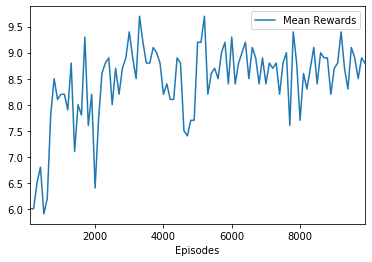

In [8]:
df.plot()

In [9]:
model.action_probability([[0.3], [0.4]])

array([[9.62011218e-02, 9.03948694e-02, 1.95887238e-01, 8.37552100e-02,
        2.05163389e-01, 1.01765491e-01, 7.45723173e-02, 5.23680486e-02,
        9.00996529e-05, 1.59612726e-02, 1.41397845e-02, 8.26205825e-04,
        1.11625151e-04, 4.57487404e-05, 7.74023720e-05, 1.08741112e-02,
        1.20280398e-04, 4.43399996e-02, 1.32434508e-02, 6.23134765e-05],
       [9.62153748e-02, 9.04567391e-02, 1.96007103e-01, 8.37695375e-02,
        2.05270723e-01, 1.01721726e-01, 7.45419860e-02, 5.23609295e-02,
        9.01514722e-05, 1.59400757e-02, 1.40885133e-02, 8.26609263e-04,
        1.11754292e-04, 4.57222413e-05, 7.72024359e-05, 1.08755426e-02,
        1.19922530e-04, 4.42097597e-02, 1.32082338e-02, 6.23605811e-05]],
      dtype=float32)

In [10]:
def get_table(model):
    rl = rl_agent
    prices = np.array([
        [rl.action_to_price(action)] for action in range(rl.discretization)
        if rl.action_to_price(action) >= 90
    ])
    q_table = model.action_probability(rl.normalize(prices))
    print(q_table.shape)
    #return q_table
    df = pd.DataFrame(q_table, index=prices.flatten())
    print(df)
    df.columns = prices.flatten()
    df.index.name = "Last offer"
    return df

In [11]:
q_table = get_table(model)

(15, 20)
                0         1         2         3         4         5         6  \
110.000  0.029955  0.047670  0.071783  0.066371  0.084144  0.098490  0.132087   
108.625  0.029955  0.047670  0.071783  0.066371  0.084144  0.098490  0.132087   
107.250  0.035263  0.065535  0.083093  0.072722  0.091536  0.095967  0.114308   
105.875  0.041547  0.109307  0.094281  0.072959  0.090368  0.074022  0.067594   
104.500  0.042676  0.153987  0.106412  0.066312  0.091217  0.050054  0.039070   
103.125  0.041550  0.155661  0.163058  0.072508  0.148641  0.042947  0.044563   
101.750  0.036651  0.119057  0.192564  0.075071  0.195956  0.043381  0.060861   
100.375  0.034458  0.101816  0.195369  0.076141  0.210100  0.045693  0.072329   
99.000   0.044206  0.106311  0.217576  0.086093  0.236516  0.058320  0.084420   
97.625   0.059247  0.109071  0.226292  0.091031  0.242804  0.072594  0.085966   
96.250   0.071330  0.106071  0.222695  0.091024  0.236733  0.082817  0.083804   
94.875   0.081307  

ValueError: Length mismatch: Expected axis has 20 elements, new values have 15 elements

In [ ]:
110*0.75

In [ ]:
q_table

In [ ]:
plt.plot(model.action_probability([0.5]))

In [19]:
episodes

[100,
 100,
 100,
 200,
 300,
 400,
 400,
 400,
 400,
 500,
 500,
 600,
 600,
 600,
 700,
 700,
 700,
 800,
 900,
 900,
 1000,
 1000,
 1100,
 1100,
 1200,
 1200,
 1300,
 1400,
 1400,
 1500,
 1500,
 1600,
 1600,
 1700,
 1700,
 1800,
 1800,
 1800,
 1900,
 1900,
 2000,
 2000,
 2100,
 2100,
 2200,
 2200,
 2300,
 2400,
 2500,
 2500,
 2500,
 2600,
 2700,
 2700,
 2800,
 2900,
 3000,
 3100,
 3200,
 3300,
 3300,
 3300,
 3400,
 3400,
 3500,
 3500,
 3500,
 3600,
 3600,
 3700,
 3700,
 3800,
 3800,
 3900,
 3900,
 4000,
 4000,
 4100,
 4200,
 4300,
 4400,
 4500,
 4500,
 4500,
 4600,
 4700,
 4800,
 4900,
 4900,
 5000,
 5000,
 5100,
 5100,
 5200,
 5300,
 5300,
 5400,
 5500,
 5500,
 5600,
 5700,
 5700,
 5800,
 5900,
 5900,
 6000,
 6000,
 6100,
 6100,
 6200,
 6200,
 6300,
 6400,
 6500,
 6600,
 6700,
 6800,
 6800,
 6900,
 6900,
 7000,
 7000,
 7100,
 7200,
 7200,
 7200,
 7300,
 7300,
 7400,
 7400,
 7400,
 7500,
 7600,
 7600,
 7600,
 7700,
 7800,
 7900,
 8000,
 8100,
 8100,
 8200,
 8300,
 8400,
 8400,
 8500